# Phase diagram of noisy Trotter error

In [1]:
import numpy as np
# from qiskit.quantum_info import DensityMatrix, Statevector, SparsePauliOp, Operator
# from numpy.linalg import matrix_power

from quantum_simulation_recipe.spin import Nearest_Neighbour_1d
from quantum_simulation_recipe.plot_config import *
from resource_estimation import worst_case_err
cc = ["#b5423dFF", "#405977FF", "#616c3aFF", "#e3a13aFF", "#7a2c29FF", "#253a6aFF", "#8b9951FF"]
# set_color_cycle(cc)

# mpl.rcParams['font.family'] = 'sans-serif'  # 'Helvetica'  sans-serif
fig_dir, data_dir = './figs', './data'

Matplotlib is building the font cache; this may take a moment.


## Comparison

In [2]:
set_fontsize(medium=MEDIUM_SIZE+4, large=LARGE_SIZE+4, linewidth=2.0)
import matplotlib.colors as colors

grids = 50
# n, t = 10, 1
# r_list = np.unique(np.logspace(0.6, 2.3, grids, dtype=int))
# gamma_list = np.logspace(-4, -2, grids)
n, t = 50, 1
r_list = np.unique(np.logspace(0.7, 3.5, grids, dtype=int))
gamma_list = np.logspace(-6, -4, grids)
# p_list = np.logspace(-5, -3, grids)
d, gamma = np.meshgrid(r_list, gamma_list)
pn_list = gamma_list/n
d, pn = np.meshgrid(r_list, pn_list)

# C_s, C_i = 0.63, 0.25
# c_s, c_i = 0.17, 1.169
# B_s, B_i = 0.83, 4.00
# b_s, b_i = 0, 2.26

C_s, C_i = 0.66, 0.19
c_s, c_i = 0, 0.5
B_s, B_i = 0.68, 4.58
b_s, b_i = 0, 0.5

comm_norm_fitted = (0.00216*n+0.00095)*(10)**3

def fitted_1step_total_error(gamma: float, d: int, r: int):
    """
    Calculate the fitted epsilon value based on the given parameters.

    Args:
        gamma (float): noise rate per gate.
        d (int): circuit depth (the index of the Trotter step).
        r (int): Trotter number.

    Returns:
        float: The total error in the d-th Trotter step with r Trotter number.
    """
    return (C_s*n+C_i)*gamma*np.exp(-(c_s*n+c_i)*d*gamma) + (B_s*n+B_i)*(t**3/r**3)*np.exp(-(b_s*n+b_i)*d*gamma)

# eps_tot = (C_s*n+C_i)*p*np.exp(-(c_s*n+c_i)*d*p) + (B_s*n+B_i)*(t**3/r**3)*np.exp(-(b_s*n+b_i)*d*p)
eps_acc_emp_fit = np.array([[min(2, sum([fitted_1step_total_error(gamma, d, r) for d in range(1, r+1)])) for r in r_list] for gamma in gamma_list])
# eps_acc_n = np.array([[min(2, sum([fitted_1step_total_error(gamma, d, r) for d in range(1, r+1)])) for r in r_list] for gamma in pn_list])
eps_acc_naive = np.array([[min(2, fitted_1step_total_error(gamma, 1, r)*r) for r in r_list] for gamma in gamma_list])
eps_acc_worst_fit = np.array([[min(2, worst_case_err(n, t, 2, comm_norm_fitted, gamma, r)) for r in r_list] for gamma in gamma_list])

max improvement:  1.3361403165397936


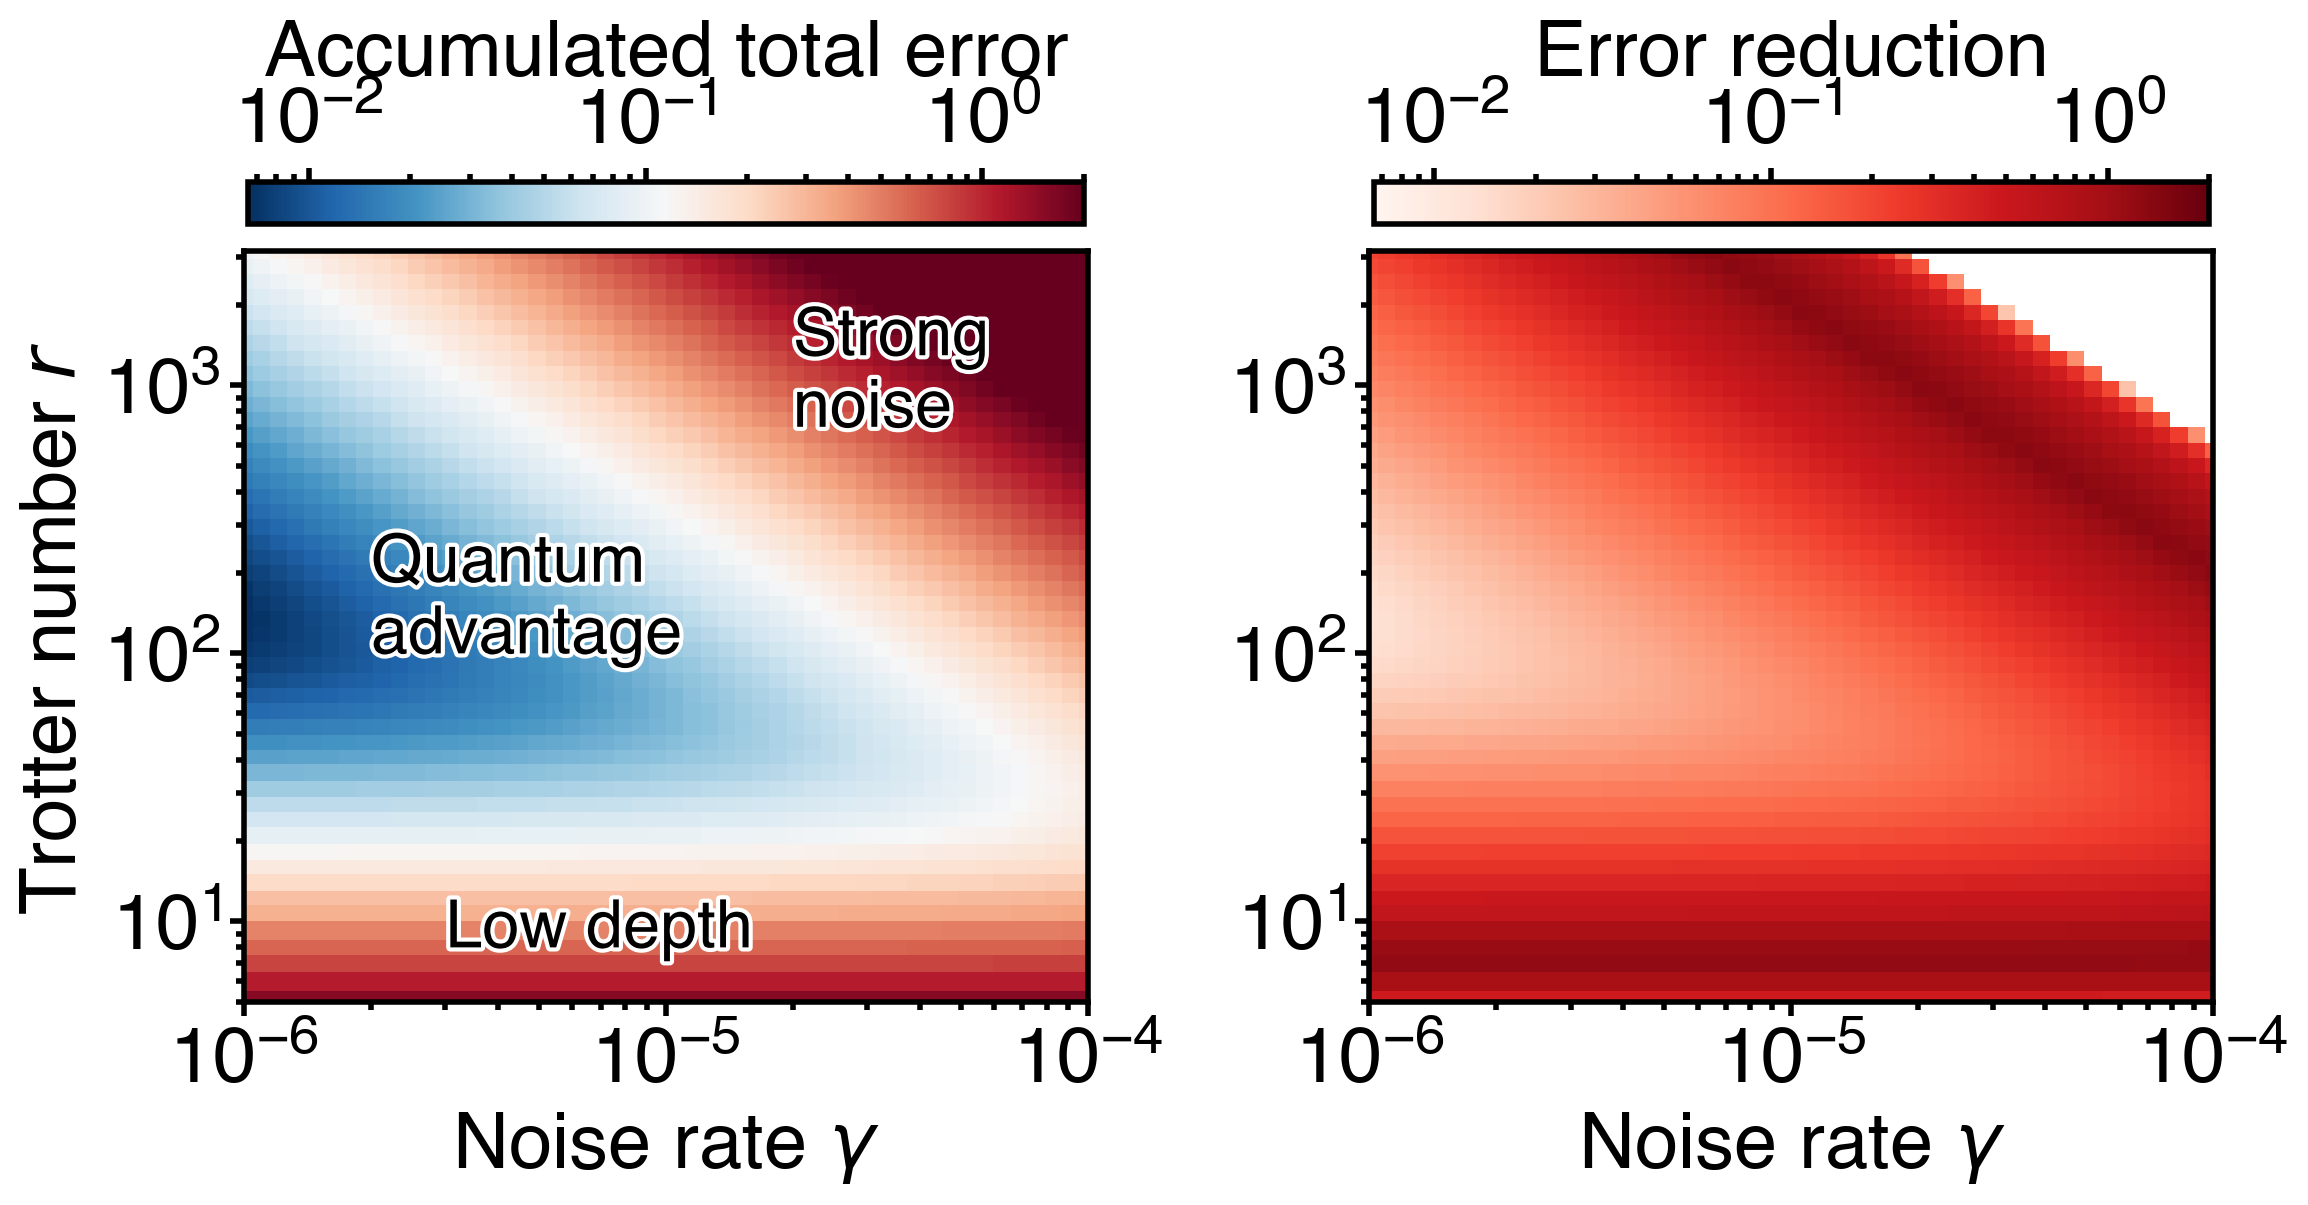

In [3]:
import matplotlib.patheffects as PathEffects

# print(eps_acc)
# print(eps_acc_naive)
# eps_acc_diff = (eps_acc_fit - eps_acc)/eps_acc_fit
eps_acc_diff = eps_acc_worst_fit - eps_acc_emp_fit
# eps_acc_diff = eps_acc_naive - eps_acc
print('max improvement: ', eps_acc_diff.max())

fig, axes = plt.subplots(1, 2, figsize=(12, 6.5))

c = axes[0].pcolormesh(gamma, d, eps_acc_emp_fit, norm=colors.LogNorm(vmin=eps_acc_emp_fit.min(), vmax=eps_acc_emp_fit.max()), cmap='RdBu_r')   # RdBu_r  PiYG_r
axes[0].axis([gamma.min(), gamma.max(), d.min(), d.max()])
fig.colorbar(c, ax=axes[0], label='Accumulated total error', location='top', pad=0.03, shrink=0.99) 
axes[0].set_xlabel(r'Noise rate $\gamma$') # ax.set_xlabel(r'Noise per layer $\gamma\cdot n$')
axes[0].set_ylabel(r'Trotter number $r$')
axes[0].loglog()
txt1 = axes[0].annotate('Low depth', xy=(0.000003, 8), xytext=(0.000003, 8), fontsize=24, color='black', weight='bold') 
txt1.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])
txt2 = axes[0].annotate('Strong\nnoise', xy=(0.00002, 700), xytext=(0.00002, 700), fontsize=24, color='black', weight='bold')
txt2.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])
txt3 = axes[0].annotate('Quantum\nadvantage', xy=(0.000002, 100), xytext=(0.000002, 100), fontsize=24, color='black', weight='bold')
txt3.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])

c = axes[1].pcolormesh(gamma, d, eps_acc_diff, norm=colors.LogNorm(vmin=eps_acc_emp_fit.min(), vmax=eps_acc_emp_fit.max()), cmap='Reds')   # Reds
axes[1].axis([gamma.min(), gamma.max(), d.min(), d.max()])
fig.colorbar(c, ax=axes[1], label='Error reduction', location='top', pad=0.03, shrink=0.99) 
axes[1].set_xlabel(r'Noise rate $\gamma$')
# txt4 = axes[1].annotate('Improvement', xy=(0.00001, 1000), xytext=(0.00001, 1000), fontsize=24, color='black', weight='bold')
# txt4.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='w')])
# ax.set_xlabel(r'Noise per layer $\gamma\cdot n$')
# axes[1].set_ylabel(r'Depth $r$')
axes[1].loglog()
# axes[0].text(-0.18, 1.24, '(a)', transform=axes[0].transAxes, fontsize=28, weight='bold')
# axes[1].text(-0.18, 1.24, '(b)', transform=axes[1].transAxes, fontsize=28, weight='bold')
fig.savefig(f'{fig_dir}/phase_diagram_diff_n={n}_worst.pdf', bbox_inches='tight')